# Description
For this notebook, we will use the <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">Wine Quality Dataset</a> from the UCI machine learning repository. It has separate datasets for red wine and white wine.


# Imports

In [82]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Datasets

In [83]:
#loading white_wine dataset from UCI repository and adding is_red column to dataset as class column

URL= 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_wine=pd.read_csv(URL, sep=';')
white_wine['is_red']=0
white_wine=white_wine.drop_duplicates(keep='first')

In [84]:
#loading red_wine dataset from UCI repository and adding is_red column to dataset as class column

URL='http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_wine=pd.read_csv(URL, sep=';')
red_wine['is_red']=1
red_wine=red_wine.drop_duplicates(keep='first')

# Data pre_processing

In [85]:
wine=pd.concat([white_wine, red_wine], ignore_index=True)

# balancing the dataset

<AxesSubplot:>

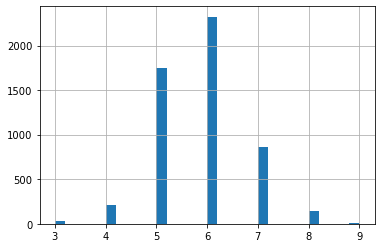

In [86]:
wine['quality'].hist(bins=30)

In [87]:
wine=wine[(wine['quality']>4) & (wine['quality'] < 8)]
wine.reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
4927,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
4928,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
4929,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


<AxesSubplot:>

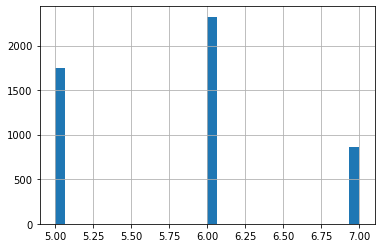

In [88]:
wine['quality'].hist(bins=30)

# split dataset to train, val and test sets

In [89]:
train, test=train_test_split(wine, test_size=0.2, random_state=1)
train, val=train_test_split(train, test_size=0.2, random_state=1)

# Data description

In [90]:
wine_stat=train.describe()
wine_stat.pop('is_red')
wine_stat.pop('quality')
wine_stat=wine_stat.transpose()
wine_stat

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.218558,1.298609,3.80000,6.4000,7.0000,7.7000,15.60000
volatile acidity,3155.0,0.339976,0.164326,0.08000,0.2300,0.2900,0.4100,1.33000
citric acid,3155.0,0.321062,0.148083,0.00000,0.2500,0.3100,0.4000,1.66000
residual sugar,3155.0,5.128241,4.570110,0.60000,1.8000,2.8000,7.7000,65.80000
chlorides,3155.0,0.056971,0.037610,0.01400,0.0380,0.0470,0.0670,0.61100
free sulfur dioxide,3155.0,30.413946,17.179817,1.00000,17.0000,29.0000,41.0000,128.00000
total sulfur dioxide,3155.0,114.707132,56.189167,6.00000,75.0000,117.0000,153.0000,344.00000
density,3155.0,0.994580,0.002988,0.98722,0.9922,0.9948,0.9968,1.03898
pH,3155.0,3.221300,0.158116,2.72000,3.1100,3.2100,3.3200,3.90000
sulphates,3155.0,0.536662,0.150296,0.22000,0.4400,0.5100,0.6000,1.98000


# Format model outputs

In [91]:
def get_output(data):
    is_red=data.pop('is_red')
    is_red=np.array(is_red)
    quality=data.pop('quality')
    quality=np.array(quality)
    return (quality, is_red)

In [92]:
train_y=get_output(train)
val_y=get_output(val)
test_y=get_output(test)

# Normalize the dataset

In [93]:
def norm(x):
    return (x - wine_stat['mean']) / wine_stat['std'] 


In [94]:
train_normalized=norm(train)
val_normalize=norm(val)
test_normalized=norm(test)

# Model

In [95]:

def final_model(train_data):
    shape=len(test_normalized.columns)
    Input_layer=Input(shape=(shape,))
    x=Dense(128, activation='relu')(Input_layer)
    x=Dense(128, activation='relu')(x)
    wine_quality=Dense(1, name='wine_quality')(x)
    wine_type=Dense(1, activation='sigmoid', name='wine_type')(x)
   
    model = Model(inputs=Input_layer, outputs=[wine_quality, wine_type])
    return model
    
   

In [96]:
model=final_model(train_normalized)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 128)          1536        ['input_6[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 128)          16512       ['dense_10[0][0]']               
                                                                                                  
 wine_quality (Dense)           (None, 1)            129         ['dense_11[0][0]']               
                                                                                            

In [97]:
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rms, 
              loss = {'wine_type' : 'binary_crossentropy', # YOUR CODE HERE,
                      'wine_quality' : 'mse' # YOUR CODE HERE
                     },
              metrics = {'wine_type' : 'accuracy', # YOUR CODE HERE,
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError() # YOUR CODE HERE
                       }
             )

In [98]:
model.fit(train_normalized, train_y, epochs=180, validation_data=(val_normalize, val_y))

Epoch 1/180
99/99 [==============================] - 1s 4ms/step - loss: 24.9934 - wine_quality_loss: 24.3698 - wine_type_loss: 0.6236 - wine_quality_root_mean_squared_error: 4.9366 - wine_type_accuracy: 0.7211 - val_loss: 16.7197 - val_wine_quality_loss: 16.1198 - val_wine_type_loss: 0.5998 - val_wine_quality_root_mean_squared_error: 4.0150 - val_wine_type_accuracy: 0.7338
Epoch 2/180
99/99 [==============================] - 0s 2ms/step - loss: 10.6691 - wine_quality_loss: 10.0972 - wine_type_loss: 0.5719 - wine_quality_root_mean_squared_error: 3.1776 - wine_type_accuracy: 0.7426 - val_loss: 5.7547 - val_wine_quality_loss: 5.2122 - val_wine_type_loss: 0.5424 - val_wine_quality_root_mean_squared_error: 2.2830 - val_wine_type_accuracy: 0.7364
Epoch 3/180
99/99 [==============================] - 0s 2ms/step - loss: 4.0886 - wine_quality_loss: 3.5937 - wine_type_loss: 0.4949 - wine_quality_root_mean_squared_error: 1.8957 - wine_type_accuracy: 0.7442 - val_loss: 2.7473 - val_wine_quality_l

# Test the Model

In [99]:
pred_y=model.predict(test_normalized)

31/31 [==============================] - 0s 875us/step


In [100]:
print(pred_y[0][2])
print(test_y[0][2])
print(pred_y[1][2])
print(test_y[1][2])

[5.8666167]
6
[2.333919e-06]
0
